# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing 
from scipy.interpolate import interp1d

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

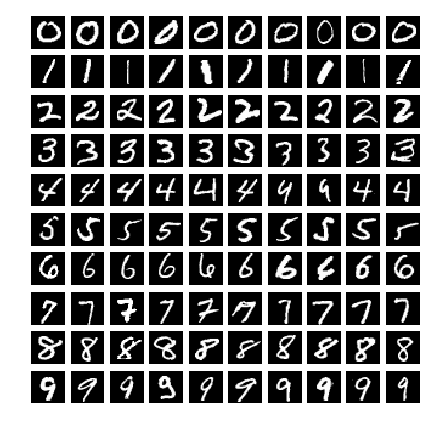

In [3]:
#def P1(num_examples=10):

### STUDENT START ###
from itertools import repeat

# set up subplots for display
f, axarr = plt.subplots(10, 10,figsize=(5,5))
f.subplots_adjust(hspace=0.2)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# loop through labels to find matching indexes for our examples
index=0;
labelcount=list(repeat(0,10))
subplotidx=list(repeat(0,10))
for val in mini_train_labels:
    if (labelcount[int(val)]<10):
        
        pixels = mini_train_data[index,:]*255
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28))
        
        splot = axarr[int(val),labelcount[int(val)]]
        
        splot.imshow(pixels, cmap='gray',interpolation='nearest')
        splot.axis('off')

        labelcount[int(val)]+=1;
    index+=1;

### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
#def P2(k_values):

### STUDENT START ###

# Initialize a KNN classifier, fit to training data and run predictions for different values of k
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(mini_train_data,mini_train_labels)
    prediction = knn.predict(dev_data)
    
    # display accuracy score
    print "\nAccuracy for k_value:", k, " is ", knn.score(dev_data,dev_labels)

# Generate classification report k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mini_train_data,mini_train_labels)
prediction = knn.predict(dev_data)
print '\nClasification report for k=1:\n\n', classification_report(dev_labels, prediction)
    
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)


Accuracy for k_value: 1  is  0.888

Accuracy for k_value: 3  is  0.878

Accuracy for k_value: 5  is  0.869

Accuracy for k_value: 7  is  0.865

Accuracy for k_value: 9  is  0.863

Clasification report for k=1:

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: The most difficult digit is 9 given that it has the lowest f1-score of 0.80

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

train_data, train_labels

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies  = []

# iterate through various training sizes, compute the time for each training and display accuracy scores
for train_size in train_sizes:
    train_sample_data = train_data[:train_size]
    train_sample_labels = train_labels[:train_size]
    
    # fit model from training data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_sample_data,train_sample_labels)
    
    # compute time for prediction
    time_begin = time.time()
    prediction = knn.predict(dev_data)
    time_end = time.time()
    
    # compute accuracy on dev data and update the accuracy array with the accuracy score
    score = knn.score(dev_data,dev_labels)
    accuracies.append(round(score,4))
    
    # print results
    print "\nk=1,train_size=",train_size," Accuracy=",score," Time taken=",round((time_end-time_begin),2),"seconds"
        
print "Accuracy scores:",accuracies

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)


k=1,train_size= 100  Accuracy= 0.72  Time taken= 0.09 seconds

k=1,train_size= 200  Accuracy= 0.786  Time taken= 0.17 seconds

k=1,train_size= 400  Accuracy= 0.841  Time taken= 0.33 seconds

k=1,train_size= 800  Accuracy= 0.884  Time taken= 0.69 seconds

k=1,train_size= 1600  Accuracy= 0.902  Time taken= 1.34 seconds

k=1,train_size= 3200  Accuracy= 0.926  Time taken= 2.84 seconds

k=1,train_size= 6400  Accuracy= 0.937  Time taken= 5.76 seconds

k=1,train_size= 12800  Accuracy= 0.959  Time taken= 11.45 seconds

k=1,train_size= 25000  Accuracy= 0.97  Time taken= 23.1 seconds
Accuracy scores: [0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.


plot and predict linear regression without any transformation



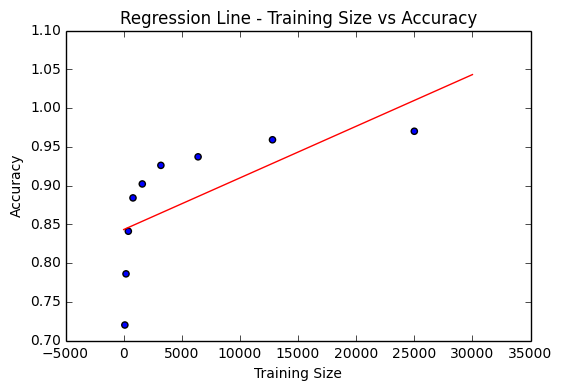

Prediction for training size = 60000  is  1.24 seconds

plot and predict linear regression after log transformation



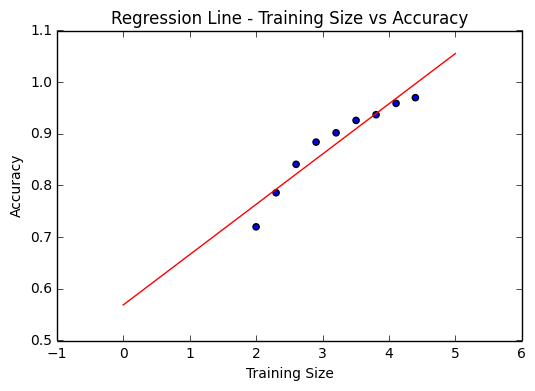

Prediction for training size = 60000  is  1.03 seconds
r-squared values for original and transformed values respectively: [0.44306129603644984, 0.9129443528579656]


In [345]:
#def P4():

### STUDENT START ###

#print accuracies
#print train_sizes
rsquared_values=[]

# create a function to plot and predict linear regression
# parameters are
#  train_size_values           - training set
#  train_size_to_predict       - training size value (for display purposes)
#  predictor_value             - training size value on which to compute accuracy
#  linspace_start/linspace_end -  range within which to plot
def plot_predict_linreg(train_sizes_values,train_size_to_predict,predictor_value,linspace_start,linspace_end):
    
    # initialize a LinearRegression object
    linreg = LinearRegression()
    
    # train_sizes_values - training sizes computed in P3
    # accuracies - accuracy values computed in P3
    lm = linreg.fit(np.transpose(np.matrix(train_sizes_values)),np.transpose(np.matrix(accuracies)))

    # compute r-squared values
    score = linreg.score(np.transpose(np.matrix(train_sizes_values)),np.transpose(np.matrix(accuracies)))
    
    # accumalate r-squared values
    rsquared_values.append(score)

    # plot outputs
    plt.scatter(train_sizes_values,accuracies)

    # plot trend line
    x=np.linspace(linspace_start,linspace_end,num=50)
    y=(lm.coef_[0]*x)+lm.intercept_[0]

    # draw the regression line
    line = plt.plot(x,y)
    plt.setp(line,'color', 'r',)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title('Regression Line - Training Size vs Accuracy')
    plt.show()

    # Predict value for training set size - 60000
    print "Prediction for training size =",train_size_to_predict," is ",round(lm.predict(predictor_value)[0],2),"seconds"
    
# plot and predict linear regression without any transformation
print "\nPlot and predict linear regression without any transformation\n"
plot_predict_linreg(train_sizes,60000,60000,0,30000)

# plot and predict linear regression without any transformation
print "\nPlot and predict linear regression after log transformation\n"
trans_train_sizes = [math.log10(num) for num in train_sizes]
plot_predict_linreg(trans_train_sizes,60000,math.log10(60000),0,5)

print "r-squared values for original and transformed values respectively:",rsquared_values

### STUDENT END ###

#P4()

ANSWER: Linear regression without any transformations does not make sense in this case since the distribution of data points is non-linear and appears to follow an exponential distribution.  In order to provide a better prediction, I have taken the log of the training size and regressed against the accuracy and the model that is obtained appears to be better as seen by the improved r-squared values for each model.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [347]:
#def P5():

### STUDENT START ###

# define a function to to build KNN classifier, run predictions and output a confusion matrix
# Parameters
# k  - number of nearest neighbors
# data/labels - training/test data and labels
# pred_data/pred_labels - prediction data and labels.
def knn_classify(k,data,labels,pred_data,pred_labels):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data,labels)
    prediction = knn.predict(pred_data)

    # output a confusion matrix 
    print "Confusion Matrix\n",confusion_matrix(pred_labels,prediction)
    print "Accuracy:",knn.score(pred_data,pred_labels)
    
    return knn

knn = knn_classify(1,mini_train_data,mini_train_labels,dev_data,dev_labels)

# from the confusion matrix - the following are more prone to confusion
# 1. 5 - Predicted as 3 (9 mistakes)
# 2. 4 - Predicted as 9 (14 mistakes)
# 3. 9 - Predicted as 4 (9 mistakes)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Select and print the accuracy for 100 random values of class 4
index=0
pred_count=0
wrong_prediction_count=0
for i in dev_labels:
    if (int(i)==4):
        if ( knn.predict(dev_data[index,:]) != 4 ):
            wrong_prediction_count+=1;
        pred_count+=1

    if pred_count>100:
        break
        
    index+=1

print "Out of 100 randomly chosen values for the most confused digit 4, we have ",wrong_prediction_count," incorrect classifications"

### STUDENT END ###

#P5()

Confusion Matrix
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Accuracy: 0.888
Out of 100 randomly chosen values for the most confused digit 4, we have  18  incorrect classifications


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.


Displaying a sample set of pixels for the preprocessing - original and blurred images


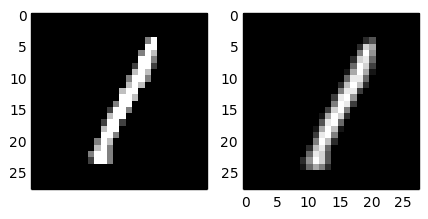


Displaying a sample set of pixels for the preprocessing - original and blurred images


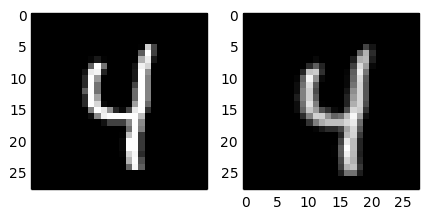


Running KNN without any preprocessed  data only

Confusion Matrix
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Accuracy: 0.888

Running KNN with preprocessed training data only

Confusion Matrix
[[  0  99   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0  86   0   0   0   0   0   0   0   0]
 [  0 104   0   0   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   0]
 [  0  96   0   0   0   0   0   0   0   0]
 [  0 106   0   0   0   0   0  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [350]:
#def P6():
    
### STUDENT START ###

# initialize the blurred data to the original data
mini_train_data_blurred = np.empty_like(mini_train_data)
dev_data_blurred = np.empty_like(dev_data)

# define a function to preprocess input values and return the blurred data
def preprocess_blur(x_values):
    
    # initialize blurred data to original data
    data_blurred = np.empty_like(x_values)
    
    # subplot for visualizing
    f, axarr = plt.subplots(1,2 ,figsize=(5,5))
    f.subplots_adjust(hspace=0.2)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

    index=0
    
    # iterate through each set of pixels in the input array and add blur
    # pixels is 784 wide array of pixels that represents each digit in the input array
    for pixels in x_values:
        
        # initialize the array of blurred pixel values to zero
        blurred_pixel_values=np.zeros((28,28))
        
        # convert the flattened set of pixels to a 28*28 array
        temp_pixels=np.copy(pixels)
        
        # reshape the pixels array into a 28*28 array
        pixels = pixels*255
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28))

        # only look at rows,colums 2 through 27 to ensure we have a quorom of 8 neighboring pixels
        for i in range(1,26):
            for j in range(1,26):
                for m in range(i-1,i+1):
                    for n in range(j-1,j+1):
                        if (not(m==i and n==j)):
                            blurred_pixel_values[i,j]+=pixels[m,n]
                            
                blurred_pixel_values[i,j]=blurred_pixel_values[i,j]/8
        
        # update the data type to unsigned int 
        blurred_pixel_values =  np.array(blurred_pixel_values,dtype='uint8')
        
        # display a few of the images to illustrate the blurring effect before and after
        if (index<1):
            print "\nDisplaying a sample set of pixels for the preprocessing - original and blurred images"
            axarr[0].imshow(pixels, cmap='gray',interpolation='nearest')
            axarr[1].imshow(blurred_pixel_values, cmap='gray',interpolation='nearest')   
            plt.show()
        
        # flatten the 28*28 array of blurred pixels back to the 784 wide array
        data_blurred[index,:]=blurred_pixel_values.flatten()
        
        #update index into the input data values array
        index+=1
        
    #print "Blurred data",data_blurred
    return data_blurred

     
# preprocess training data but not the dev data
#mini_train_data_blurred = preprocess_blur(mini_train_data[:2,])
mini_train_data_blurred = preprocess_blur(mini_train_data)

#print mini_train_data_blurred
#print "mini train data",mini_train_data[:1]
dev_data_blurred = preprocess_blur(dev_data)

# without any preprocessing
print "\nRunning KNN without any preprocessed  data only\n"
knn_classify(1,mini_train_data,mini_train_labels,dev_data,dev_labels)

# use preprocessed training data only
print "\nRunning KNN with preprocessed training data only\n"
knn_classify(1,mini_train_data_blurred,mini_train_labels,dev_data,dev_labels)

# use preprocessed dev data only
print "\nRunning KNN with preprocessed dev data only\n"
knn_classify(1,mini_train_data,mini_train_labels,dev_data_blurred,dev_labels)

# use both preprocessed dev data and training data
print "\nRunning KNN with preprocessed  dev data and training data\n"
knn_classify(1,mini_train_data_blurred,mini_train_labels,dev_data_blurred,dev_labels)

### STUDENT END ###

#P6()

ANSWER: After blurring both the training data and the dev data accuracy on the 1:NN model increased from 0.888 to 0.9

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [351]:
#def P7():

### STUDENT START ###

# Bernoulli Naive Bayes

# binarize the training data and the dev data - binarize at the 0.5 mark
nb_bnb = BernoulliNB(binarize=0.5)
nb_bnb.fit(mini_train_data,mini_train_labels)
prediction = nb_bnb.predict(dev_data)

# display classification report and accuracy
print '\nClasification report for Bernoulli NB:\n\n', classification_report(dev_labels, prediction)
print '\nAccuracy:',nb_bnb.score(dev_data,dev_labels)
    
# binarize the training data and the dev data 
nb_mnb = MultinomialNB()

# map the range of training data to narrow range 
# X between 0 to 1 (input values) and y values between 0 and 2 (pixel intensity)
m=interp1d([0,1],[0,2])

# create two new matrices to represent the training and dev data mapped to the narrow range defined above
mtd_m = np.array(np.round(m(mini_train_data)),'uint8')
dd_m  = np.array(np.round(m(dev_data)),'uint8')

# run prediction on the model
nb_mnb.fit(mtd_m,mini_train_labels)
prediction = nb_mnb.predict(dd_m)

# display classification report and accuracy
print '\nClasification report for Multinomial NB:\n\n', classification_report(dev_labels, prediction)
print '\nAccuracy:',nb_mnb.score(dd_m,dev_labels)

### STUDENT END ###

#P7()


Clasification report for Bernoulli NB:

             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        99
        1.0       0.80      0.94      0.87       105
        2.0       0.85      0.78      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.88      0.80      0.84       104
        5.0       0.77      0.63      0.69        91
        6.0       0.89      0.87      0.88        98
        7.0       0.90      0.82      0.86       113
        8.0       0.80      0.74      0.77        96
        9.0       0.72      0.81      0.76       106

avg / total       0.82      0.81      0.81      1000


Accuracy: 0.815

Clasification report for Multinomial NB:

             precision    recall  f1-score   support

        0.0       0.91      0.96      0.94        99
        1.0       0.89      0.92      0.91       105
        2.0       0.84      0.79      0.81       102
        3.0       0.64      0.76      0.70     

ANSWER: The mapping of pixel intensity to 0,1 and 2 and using Multinomial NB does not improve the classification. In fact, what is interesting is that, all mappings that are non-binary in nature appear to get progressively worse as the range that the pixel intensities are mapped to increase. It is unclear why this is the case, although, a possible reason could be that with higher intensity values, the model becomes more complex and noisy leading to lower quality of predictions.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [352]:
#def P8(alphas):

### STUDENT START ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

# run a search for the best estimator alpha
gscv = GridSearchCV(nb_bnb,alphas)
gscv.fit(mini_train_data,mini_train_labels)

print "Best alpha value for Bernoulli NB is ",gscv.best_params_

# binarize the training data and the dev data
nb_bnb = BernoulliNB(alpha=0.0,binarize=0.5)
nb_bnb.fit(mini_train_data,mini_train_labels)
prediction = nb_bnb.predict(dev_data)

# display classification report and accuracy
print '\nClasification report for Bernoulli NB for alpha=0.0:\n\n', classification_report(dev_labels, prediction)
print '\nAccuracy:',nb_bnb.score(dev_data,dev_labels)

# binarize the training data and the dev data
nb_bnb = BernoulliNB(alpha=0.01,binarize=0.5)
nb_bnb.fit(mini_train_data,mini_train_labels)
prediction = nb_bnb.predict(dev_data)

# display classification report and accuracy
print '\nClasification report for Bernoulli NB for alpha=',gscv.best_params_,':\n\n', classification_report(dev_labels, prediction)
print '\nAccuracy:',nb_bnb.score(dev_data,dev_labels)

### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

Best alpha value for Bernoulli NB is  {'alpha': 0.01}

Clasification report for Bernoulli NB for alpha=0.0:

             precision    recall  f1-score   support

        0.0       0.10      1.00      0.18        99
        1.0       0.00      0.00      0.00       105
        2.0       0.00      0.00      0.00       102
        3.0       0.00      0.00      0.00        86
        4.0       0.00      0.00      0.00       104
        5.0       0.00      0.00      0.00        91
        6.0       0.00      0.00      0.00        98
        7.0       0.00      0.00      0.00       113
        8.0       0.00      0.00      0.00        96
        9.0       0.00      0.00      0.00       106

avg / total       0.01      0.10      0.02      1000


Accuracy: 0.099

Clasification report for Bernoulli NB for alpha= {'alpha': 0.01} :

             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95        99
        1.0       0.88      0.92      0.90       105
      

In [ ]:
#print nb.best_params_

ANSWER:When alpha is zero, the accuracy is very low at 0.09. This is surprising because without the alpha parameter the function defauled alpha to 0 to indicate no smoothing and yet the accuracy in that case was very different

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [355]:
#def P9():

### STUDENT END ###

# initialize a Gaussian NB classifier
g_nb = GaussianNB()

# format print
np.set_printoptions(threshold=1000,precision=4)

# copy mini train data and dev data 
mtd=mini_train_data
dd=dev_data

# fit training data using the Gaussian NB classifier
g_nb.fit(mtd,mini_train_labels)

# display classification report and accuracy
print '\nClasification report for Gaussian NB before modifying standard deviation values:\n\n', classification_report(dev_labels, prediction_test)
print '\nAccuracy:',g_nb.score(dd,dev_labels)

# perturb the standard deviation values especially in cases where the standard deviation is very low
g_nb.sigma_ = np.where(g_nb.sigma_< 0.001,0.009,g_nb.sigma_)

# format print
np.set_printoptions(threshold=np.inf,precision=4,suppress=True)

# run predictions with the dev data on the Gaussian NB model
prediction = g_nb.predict(dd)

# run predictions 
prediction_lp = g_nb.predict_proba(dd)
prediction_test = np.argmax(prediction_lp,axis=1)

# format print
np.set_printoptions(threshold=np.inf,suppress=True)

# display classification report and accuracy
print '\nClasification report for Gaussian NB after modifying standard deviation values:\n\n', classification_report(dev_labels, prediction_test)
print '\nAccuracy:',g_nb.score(dd,dev_labels)


### STUDENT END ###

#gnb = P9()


Clasification report for Gaussian NB before modifying standard deviation values:

             precision    recall  f1-score   support

        0.0       0.93      0.94      0.93        99
        1.0       0.92      0.91      0.92       105
        2.0       0.76      0.78      0.77       102
        3.0       0.67      0.72      0.69        86
        4.0       0.88      0.62      0.73       104
        5.0       0.64      0.65      0.64        91
        6.0       0.85      0.89      0.87        98
        7.0       0.93      0.68      0.79       113
        8.0       0.67      0.71      0.69        96
        9.0       0.63      0.86      0.73       106

avg / total       0.79      0.78      0.78      1000


Accuracy: 0.621

Clasification report for Gaussian NB after modifying standard deviation values:

             precision    recall  f1-score   support

        0.0       0.93      0.94      0.93        99
        1.0       0.92      0.91      0.92       105
        2.0       0

ANSWER: The accuracy of the GaussianNB model increased as variation was added to the _sigma field. While it is not obvious as to the exact reason why this worked, one possible explanation could be a smoothing effect that this adds to the Gaussian distribution of probability values. It is likely that in lieu of a fixed value, the addition of a slight bit of randomness to the variation may generate even better levels of accuracy.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

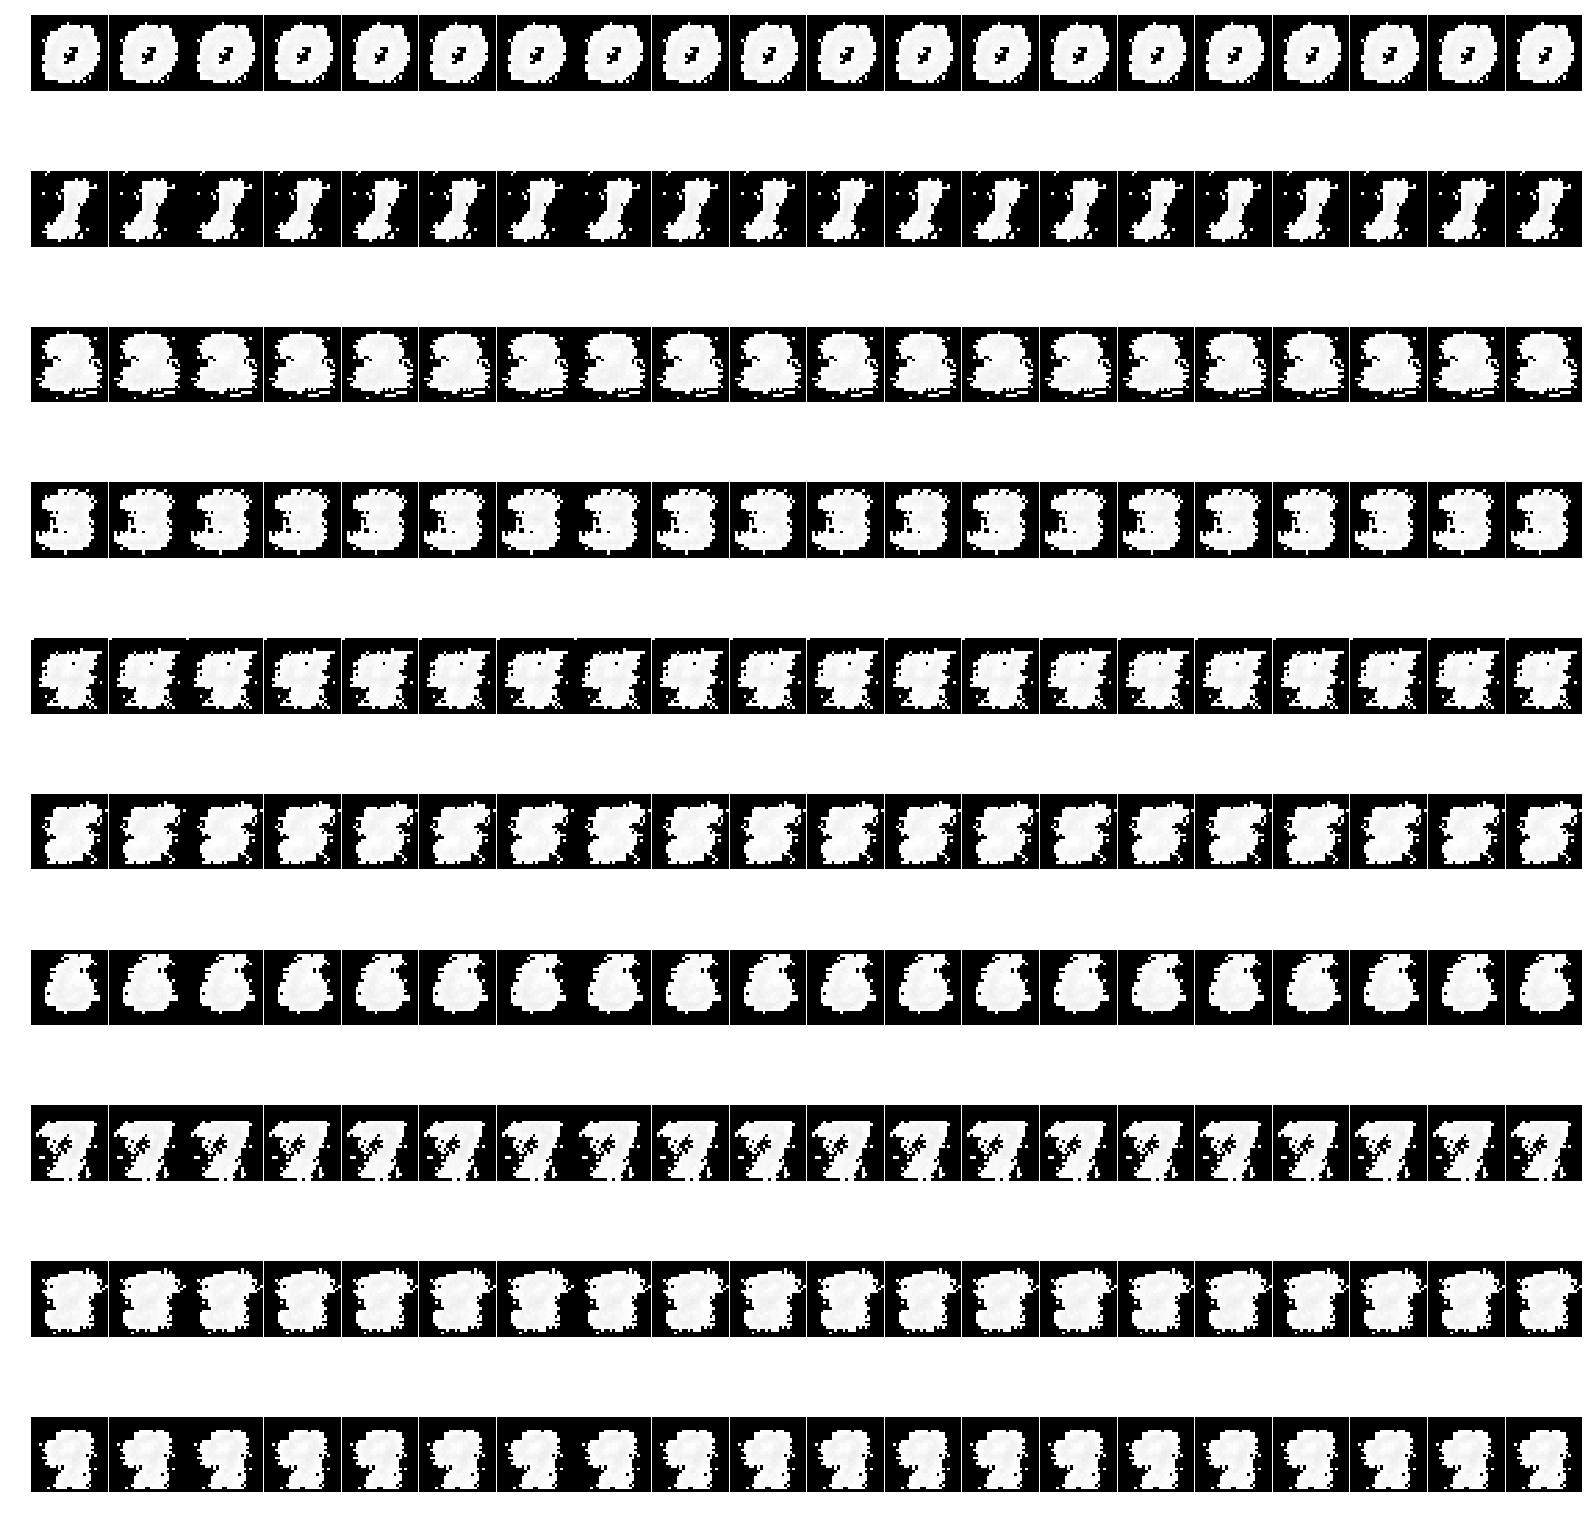

In [356]:
#def P10(num_examples):

### STUDENT START ###

# train the model with alpha = 0.01 
nb_bnb = BernoulliNB(alpha=0.01,binarize=0.5)
nb_bnb.fit(mini_train_data,mini_train_labels)
prediction = nb_bnb.predict(dev_data)

# generate next digit based on probability determined by the Bernoulli NB model
generated_digits = np.zeros([10,20,784])

# generate and assign digits
# generate 20 random digits for each class, position combination and move to generated_digits array
for i in range(0,10):
    for j in range(0,783):
        generated_digits[i,:,j] = np.random.binomial(20,np.exp(nb_bnb.feature_log_prob_[i,j]))
        
# display generated digits
f, axarr = plt.subplots(10, 20,figsize=(20,20))

f.subplots_adjust(wspace=0.025, hspace=0.05)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# loop through classes and digits and print
for i in range(0,10):
    for j in range(0,20):
        
        pixels = generated_digits[i,j]*255
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28))

        splot = axarr[i,j]

        splot.imshow(pixels, cmap='gray',interpolation='nearest')
        splot.axis('off')

### STUDENT END ###

#P10(20)

ANSWER: Then generated digits are recognizable although they are not easy to discern as the training digits. One possible reason the pixels difficult to recognized is that we are only generating values between 0 and 1 instead of a range of pixel values. Another observation is that most of the randomly digits for each class are very similar to each other and show little variation. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [ ]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

# train the model with alpha = 0.01 
nb_bnb = BernoulliNB(alpha=0.01,binarize=0.5)
nb_bnb.fit(mini_train_data,mini_train_labels)
prediction = nb_bnb.predict(dev_data)

#np.set_printoptions(threshold=1000,precision=4)
np.set_printoptions(threshold=1000,suppress=True,precision=12)

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = np.zeros_like(buckets)
total =  np.zeros_like(buckets)

def get_bucket_indexes(prob_val):
    bucket_indexes=[]
    for i in range(0,9):
        if prob_val<buckets[i]: 
            bucket_indexes.append([[i]])
    
    return bucket_indexes

#print prediction

np.set_printoptions(threshold=1000,precision=12)
max_posterior_prob = []
index=0
for val in prediction:
    max_p_index = np.argmax(nb_bnb.feature_log_prob_[np.int(val)])   
    max_pos_prob = np.exp(nb_bnb.feature_log_prob_[np.int(val),max_p_index])
    
    bucket_index_list = get_bucket_indexes(max_pos_prob)
    
    for bucket_index in bucket_index_list:
        if (val == dev_labels[index]):
            correct[bucket_index]+=1
    
        total[bucket_index]+=1
    
    index+=1

for i in range(0,9):
    accuracy=0
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %4d   correct = %4d accuracy = %.4f' %(buckets[i], total[i], correct[i],accuracy)

### STUDENT END ###



ANSWER: In this example with digit classification, it appears that accuracy increases as the posterior probability increases.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()